In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the datafile in Dataframe
df = pd.read_excel("D:/DS Class/Fliprobo/Customer_retention_dataset/New customer_retention_dataset.xlsx")

In [3]:
#Sample rows for reviewing the file contents
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
#There are many blank characters in column names, here we are stipping the column names

#First we are making a list of dataframe columns with the blank spaces stripped
cols = []
for i in df.columns:
    cols.append(i.strip())

#Secondly making a dictionary containing keys as original column names and values as stripped column names
col1 = dict(zip(df.columns, cols))

#Renaming the columns with the stripped column names
df.rename(columns=col1, inplace=True)

#Since the objective is to know the factors related to customer activation and retention,
#we can thought of the columns not related to our topic and drop them.

'Age', 'Gender', 'place of purchase', 'pincode', 'how long a customer is shopping online',
'how many purchases in past 1 year', 'means of internet', 'device used', 'screen size', 'OS', 'browser',
'After first visit, how do you reach the online retail store?',
'How much time do you explore the e- retail store before making a purchase decision?',
'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'

In [6]:
df.drop(columns = [
       '1Gender of respondent',
       '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?',
], inplace=True)

In [7]:
df.head()

,12 Which channel did you follow to arrive at your favorite online store for the first time?,15 What is your preferred payment Option?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,1,4,3,4,3,3,4,4,1,2,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,1,5,5,5,5,5,5,5,5,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,4,5,5,4,4,4,4,4,5,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,1,1,2,4,4,3,4,5,4,5,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,3,1,2,5,3,3,4,4,5,5,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [8]:
# Selecting all object type columns

df1 = df.select_dtypes('object')

df1.head()

,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Paytm.com,Amazon.in,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Paytm.com, Myntra.com",Amazon.in,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com",...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [9]:
# Select all the object type columns
df1 = df.select_dtypes('object')

In [10]:
services = []
for i in df1[df1.columns[0]]:
    for j in i.split(','):
        ser = j.strip()
        if ser not in services:
            services.append(ser)

In [11]:
services

['Amazon.in', 'Paytm.com', 'Flipkart.com', 'Myntra.com', 'Snapdeal.com']

In [12]:
services.sort()
services

['Amazon.in', 'Flipkart.com', 'Myntra.com', 'Paytm.com', 'Snapdeal.com']

In [13]:
#We now have unique brands, we can replace them with unique numeric values for easy calculations

#For Amazon we will give 1
#For Flipkart we will give 2
#For Myntra we will give 3
#For Paytm we will give 4
#For Snapdeal we will give 5

#Like for example if a row has value = ("Amazon.in, Paytm.com") then we want it's value as ("1, 4")

#Function to take the column as an argument and replace their values numeric wise
def cton(colN):
    col1 = []
    for i in colN:
        arr = []
        for j in i.split(','):
            if j.strip() in services:
                arr.append(str(services.index(j.strip())+1))
                s = ','
                s = s.join(arr)
        col1.append(s)
    return col1

In [14]:
#Function call
for i in df1.columns:
    try:
        df1[i] = cton(df1[i])
    except:
        pass

In [15]:
df1.head()

,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,"1,4",4,2,2,5,5,4,4,4,1,...,1,1,2,2,1,4,2,1,1,2
1,"1,2,3,5","1,2,3,5","1,3","2,3","1,2,3","1,2,3",3,"2,3","1,2,3","1,2",...,"1,2",3,2,5,5,5,1,3,"1,2","1,3"
2,"1,4,3","1,4,3","1,4,3","1,3","1,4,3","1,4","1,4,3","4,3","4,3",1,...,3,3,3,3,1,4,4,4,1,"1,4,3"
3,"1,2,4,3,5","1,2,4,3,5","1,2,4,3,5","1,2","1,2","1,2,5","1,2,4","2,4","1,2,3","1,2,5",...,5,"3,5",3,4,4,4,"1,2","1,2","1,2,4","1,2"
4,"1,2,4,3,5","1,2,4,3,5",3,3,"1,2,4,3,5",1,"1,4,3","2,4,3","1,2,4,3,5",1,...,"2,4",4,4,4,5,4,1,5,4,"1,3"


In [16]:
#Let's count number of services used in each columns.

c_A = c_F = c_M = c_P = c_S = 0

for i in df1[df1.columns[0]]:
    for j in i.split(','):
        if j == '1':
            c_A += 1
        elif j == '2':
            c_F += 1
        elif j == '3':
            c_M += 1
        elif j == '4':
            c_P += 1
        elif j == '5':
            c_S += 1

print("Online retailers customers have shopped from:")
print("Amazon:",c_A)
print("Flipkart:",c_F)
print("Myntra:",c_M)
print("Paytm:",c_P)
print("Snapdeal:",c_S)

Online retailers customers have shopped from:
Amazon: 269
Flipkart: 221
Myntra: 146
Paytm: 150
Snapdeal: 182


Highest number of customers use Amazon as their shopping website.
Followed by Flipkart.
Followed by Snapdeal
Followed by Paytm
Followed by Myntra

The website used lowest is Myntra and it due to obvious reasons, as it is clothing and apparels only website.
Remaining are all general website selling almost all kind of products.

In the general websites we can see Amazon is the winner, followed closely by Flipkart followed closely again by Snapdeal.

In [17]:
#Let's count number of customers considers the website as easy to use.

c_A = c_F = c_M = c_P = c_S = 0

for i in df1[df1.columns[1]]:
    for j in i.split(','):
        if j == '1':
            c_A += 1
        elif j == '2':
            c_F += 1
        elif j == '3':
            c_M += 1
        elif j == '4':
            c_P += 1
        elif j == '5':
            c_S += 1

print("Customers considering these online retailers as easy to use:")
print("Amazon:",c_A)
print("Flipkart:",c_F)
print("Myntra:",c_M)
print("Paytm:",c_P)
print("Snapdeal:",c_S)

Customers considering these online retailers as easy to use:
Amazon: 249
Flipkart: 201
Myntra: 147
Paytm: 125
Snapdeal: 130


Highest number of customers say Amazon as the easiest to use website.
Followed by Flipkart
Followed by Myntra
Followed by Snapdeal
Followed by Paytm

The website worst of the loat in terms of ease is Paytm.
Mynrea which was the least used website for shopping is actually the third most easy website to use.

Overall we can say that ease of use is a strong reason why Amazon is the winner, followed closely by Flipkart. And Myntra aven if it is clothing / apparels only website.

In [18]:
def funcCount(col):
    c_A = c_F = c_M = c_P = c_S = 0
    for i in df1[df1.columns[col-1]]:
        for j in i.split(','):
            if j == '1':
                c_A += 1
            elif j == '2':
                c_F += 1
            elif j == '3':
                c_M += 1
            elif j == '4':
                c_P += 1
            elif j == '5':
                c_S += 1
    print("Number of customers saying for below online retailers have {}:".format(df1.columns[col-1]))
    print("Amazon:",c_A)
    print("Flipkart:",c_F)
    print("Myntra:",c_M)
    print("Paytm:",c_P)
    print("Snapdeal:",c_S)

In [19]:
funcCount(3)

Number of customers saying for below online retailers have Visual appealing web-page layout:
Amazon: 227
Flipkart: 175
Myntra: 115
Paytm: 67
Snapdeal: 61


Visually appealing website is Amazon, followed by Flipkart by a margin of more than 50.
Again the third place is for Myntra with a gap of 60 to it's rival ahead.
Paytm and snapdeal are defeated by half the count of their rival just ahead, infact they are out of the league.


So, till now we have seen Amazon and Flipkart and Snapdeal are the highest used websites. With Amazon leading the pack, but as we move further doen the gap os almost halfed.

Then ease of use also Amazon is the clear winner, followed by Flipkart then Myntra. Here Snapdeal loses the battle.
Leaving Amazon and Flipkart way up ahead of it.

Then we saw that visually Amazon apeases the customers most, followed by Flipkart, here Snapdeal comes last and Myntra again taking the third place. And climbing up the ladder.

In [20]:
#Let's jump to the next parameter.

funcCount(4)

Number of customers saying for below online retailers have Wild variety of product on offer:
Amazon: 220
Flipkart: 184
Myntra: 64
Paytm: 20
Snapdeal: 14


This is what I believe one of the most important aspect of a retailer. That they have a wide array of products and options to offer to their customers.

Amazon leading by considerably big margin on Flipkart, then again Flipkart is very far up ahead of the remaining retailers, that it would be a waste to talk about them. But we can still consider Myntra, as it is merely a Clothing/ Apparels store. Paytm and Snapdeal are general retailers with almost all categories of products and services still they are soo far behind of Myntra. It's not a good thing to stay in the retailing industry.

In [21]:
funcCount(5)

Number of customers saying for below online retailers have Complete, relevant description information of products:
Amazon: 238
Flipkart: 194
Myntra: 64
Paytm: 59
Snapdeal: 59


The products are one thing and information about the products is a whole new world where one needs to focus. As this is the thing one looks up while comparing two or more product for similar thing.
Like I wuld like to buy a music player, there are thousands of options available today, so one of the most important thing which could attract my mind is the information I can get about the products, like standby time, playback time, volumne, storage, format supported, even if a product is very visually appealing and with a big brand name on it and if I dont know anything about it, I would certainly won't go for it. So giving a vivid information on a product is very important in determining the winner.

By the above numbers we can say that Amazon and Flipkart are the only retailers who are giving information, rest are simply pretending.

So, I think, by this time we should only talk about Amazon and Flipkart, as by looking at the job they are doing one can easliy learn to activate and retain teh customers, we don't need to talk about  remaining three retailers namely: Myntra, Snapdeal and Paytm.

In [22]:
funcCount(6)

Number of customers saying for below online retailers have Fast loading website speed of website and application:
Amazon: 249
Flipkart: 162
Myntra: 74
Paytm: 99
Snapdeal: 81


By above numbers we can see that even if having more products and more information per product fastest working site is Amazon and Flipkart, here Amazon is beating Flipkart by a huge margin. As I have seen personally too.

In [23]:
funcCount(7)

Number of customers saying for below online retailers have Reliability of the website or application:
Amazon: 227
Flipkart: 146
Myntra: 64
Paytm: 96
Snapdeal: 45


Obviously when I am in need of something very urgent then I would go to the most reliable source. Here the clear winner is Amazon. Snapdeal has again managed to do the worst possible job, kudos to them.

In [24]:
df[df.columns[1]].value_counts()

1    148
2     76
4     45
Name: 15 What is your preferred payment Option?, dtype: int64

Code 2[Better alternative offer] is the most common option why a customer leaves without completing the order.

In [25]:
df[df.columns[3]].value_counts()

5    164
4     80
1     18
3      7
Name: 18 The content on the website must be easy to read and understand, dtype: int64

Code 5[Strongly agree] is the very dominant option customers prefer for a website (i.e. Easy to read and understand). And we have seen above Easy to use and visually appealing can fall under this category which a customer demands most.

Let us see for a last parameter, by seeing at all the comparisons we have done we can obviously say that Amazon is the winner, but let's see what the data has to say.

In [26]:
#len(df1.columns)
funcCount(24)

Number of customers saying for below online retailers have Which of the Indian online retailer would you recommend to a friend?:
Amazon: 219
Flipkart: 127
Myntra: 76
Paytm: 44
Snapdeal: 0


Amazon is the winner here.

In [27]:
import matplotlib.pyplot as plt

In [28]:
def funcPie(col):
    dict1 = {'Amazon': 0, 'Flipkart': 0, 'Myntra': 0, 'Paytm': 0, 'Snapdeal': 0}
    for i in df1[df1.columns[col-1]]:
        for j in i.split(','):
            if j == '1':
                dict1['Amazon'] += 1
            elif j == '2':
                dict1['Flipkart'] += 1
            elif j == '3':
                dict1['Myntra'] += 1
            elif j == '4':
                dict1['Paytm'] += 1
            elif j == '5':
                dict1['Snapdeal'] += 1
    print("Number of customers saying for below online retailers have {}:".format(df1.columns[col-1]))
    plt.pie(dict1.values(), labels= dict1.keys())
    plt.show()

# Let's draw some charts from the data.

Number of customers saying for below online retailers have From the following, tick any (or all) of the online retailers you have shopped from;:


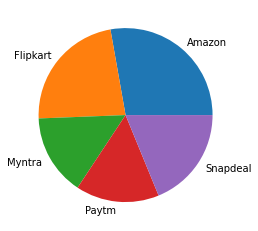

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Easy to use website or application:


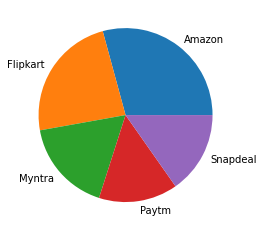

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Visual appealing web-page layout:


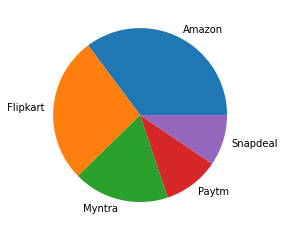

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Wild variety of product on offer:


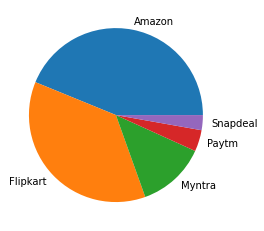

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Complete, relevant description information of products:


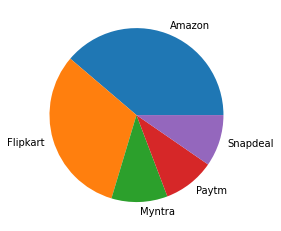

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Fast loading website speed of website and application:


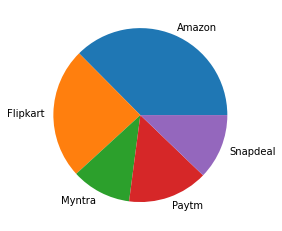

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Reliability of the website or application:


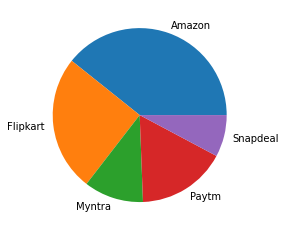

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Quickness to complete purchase:


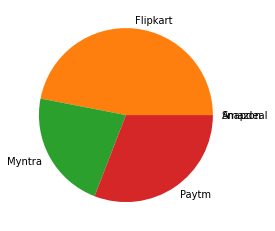

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Availability of several payment options:


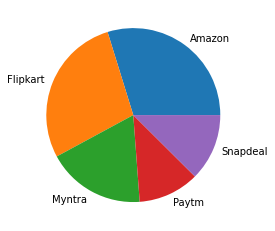

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Speedy order delivery:


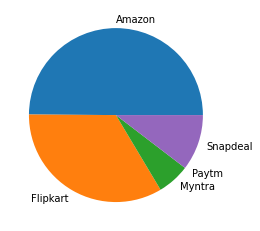

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Privacy of customers’ information:


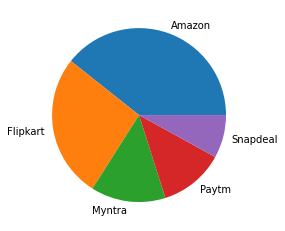

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Security of customer financial information:


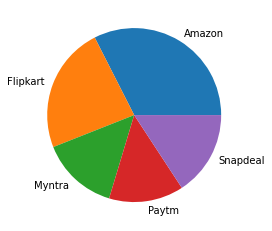

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Perceived Trustworthiness:


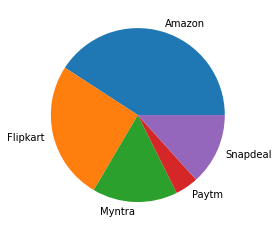

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Presence of online assistance through multi-channel:


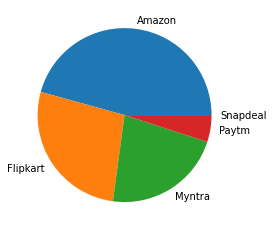

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Longer time to get logged in (promotion, sales period):


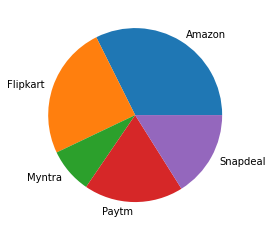

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Longer time in displaying graphics and photos (promotion, sales period):


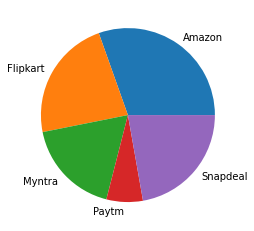

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Late declaration of price (promotion, sales period):


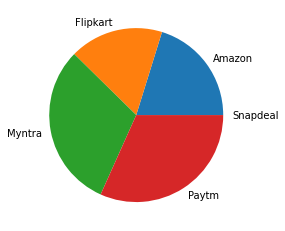

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Longer page loading time (promotion, sales period):


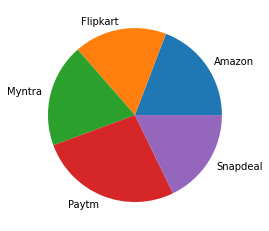

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Limited mode of payment on most products (promotion, sales period):


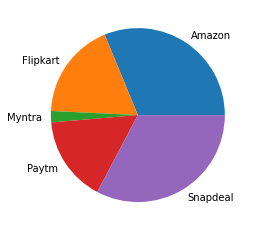

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Longer delivery period:


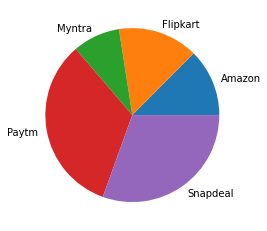

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Change in website/Application design:


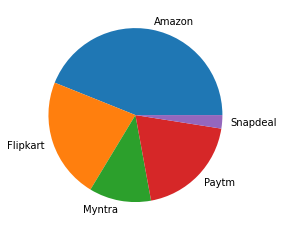

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Frequent disruption when moving from one page to another:


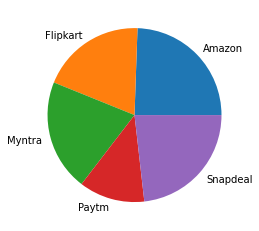

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Website is as efficient as before:


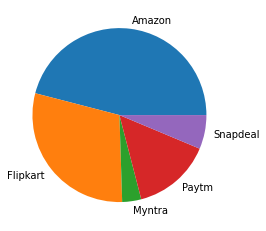

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers have Which of the Indian online retailer would you recommend to a friend?:


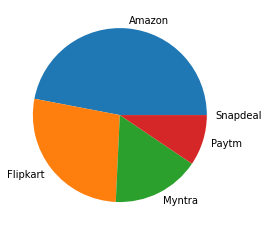

--------------------------------------------------------------------------------------------


In [29]:
for i in range(1,len(df1.columns)+1):
    funcPie(i)
    print("--------------------------------------------------------------------------------------------")

In [30]:
df[df.columns[1]].value_counts()

1    148
2     76
4     45
Name: 15 What is your preferred payment Option?, dtype: int64

Code 1[Credit/Debit cards] is the most preferred option for customers.

In [31]:
funcCount(11)

Number of customers saying for below online retailers have Privacy of customers’ information:
Amazon: 221
Flipkart: 150
Myntra: 78
Paytm: 68
Snapdeal: 45


In [32]:
funcCount(12)

Number of customers saying for below online retailers have Security of customer financial information:
Amazon: 206
Flipkart: 149
Myntra: 91
Paytm: 88
Snapdeal: 100


Highest number of customers trusts Amazon for their financial security and privacy and when combined with the number of customers who prefer Credit/Debit cards as their payment, they are very much likely to go to Amazon.

In [33]:
for i,j in enumerate(df.columns):
    print(i+1,j)

1 12 Which channel did you follow to arrive at your favorite online store for the first time?
2 15 What is your preferred payment Option?
3 17 Why did you abandon the “Bag”, “Shopping Cart”?
4 18 The content on the website must be easy to read and understand
5 19 Information on similar product to the one highlighted  is important for product comparison
6 20 Complete information on listed seller and product being offered is important for purchase decision.
7 21 All relevant information on listed products must be stated clearly
8 22 Ease of navigation in website
9 23 Loading and processing speed
10 24 User friendly Interface of the website
11 25 Convenient Payment methods
12 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time
13 27 Empathy (readiness to assist with queries) towards the customers
14 28 Being able to guarantee the privacy of the customer
15 29 Responsiveness, availability of several communication channels (email, online rep

In [34]:
df[df.columns[3]].value_counts()

5    164
4     80
1     18
3      7
Name: 18 The content on the website must be easy to read and understand, dtype: int64

Code 5[Strongly agree] is most frequent, means customer very much prefer the content to be easy to read and understand and Amazon was winner in this category too.

In [35]:
df[df.columns[3]].value_counts().to_dict()

{5: 164, 4: 80, 1: 18, 3: 7}

In [36]:
# Read the datafile in Dataframe
df_Label = pd.read_excel("D:/DS Class/Fliprobo/Customer_retention_dataset/Labelled Data.xlsx")

In [37]:
#There are many blank characters in column names, here we are stipping the column names

#First we are making a list of dataframe columns with the blank spaces stripped
cols = []
for i in df_Label.columns:
    cols.append(i.strip())

#Secondly making a dictionary containing keys as original column names and values as stripped column names
col1 = dict(zip(df_Label.columns, cols))

#Renaming the columns with the stripped column names
df_Label.rename(columns=col1, inplace=True)

In [39]:
df_Label.drop(columns = [
       '1Gender of respondent',
       '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
], inplace=True)

In [60]:
def funcPie1(col):
    dict1 = df_Label[df_Label.columns[col-1]].value_counts().to_dict()
    print("Number of customers saying for below online retailers '{}':".format(df_Label.columns[col-1]))
    plt.pie(dict1.values(), labels= dict1.keys())
    plt.show()

Number of customers saying for below online retailers '18 The content on the website must be easy to read and understand':


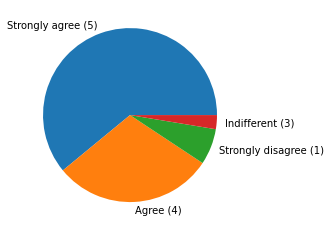

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '19 Information on similar product to the one highlighted  is important for product comparison':


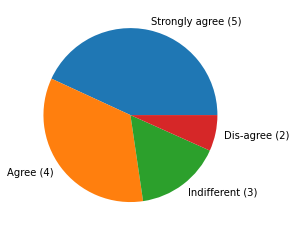

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '20 Complete information on listed seller and product being offered is important for purchase decision.':


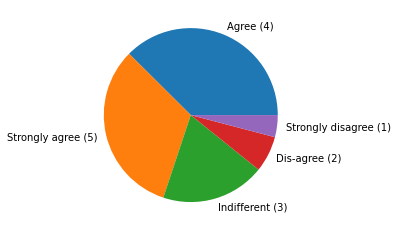

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '21 All relevant information on listed products must be stated clearly':


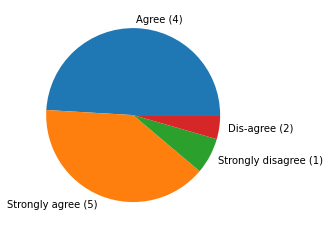

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '22 Ease of navigation in website':


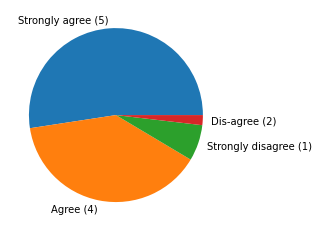

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '23 Loading and processing speed':


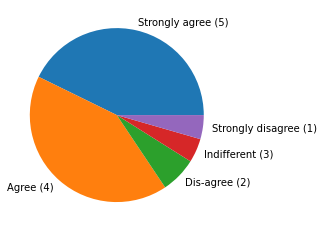

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '24 User friendly Interface of the website':


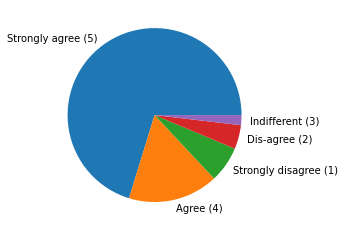

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '25 Convenient Payment methods':


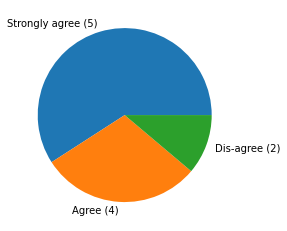

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':


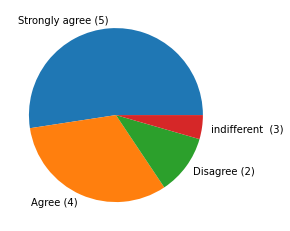

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '27 Empathy (readiness to assist with queries) towards the customers':


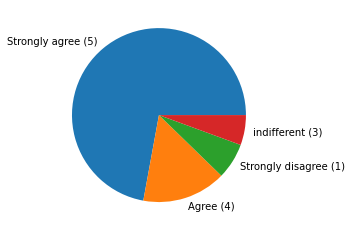

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '28 Being able to guarantee the privacy of the customer':


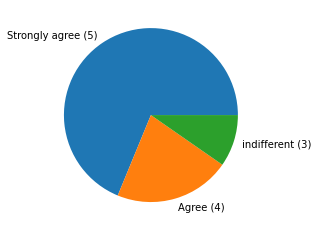

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':


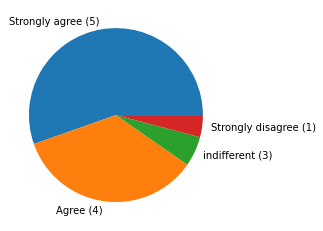

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '30 Online shopping gives monetary benefit and discounts':


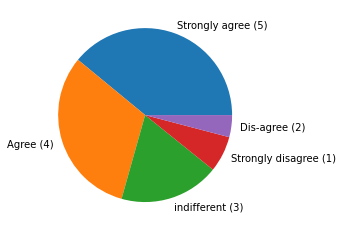

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '31 Enjoyment is derived from shopping online':


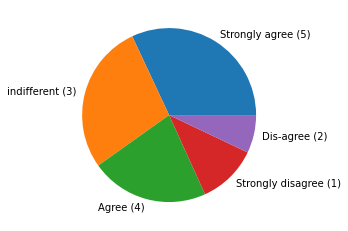

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '32 Shopping online is convenient and flexible':


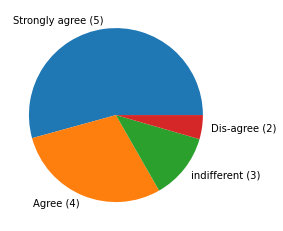

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '33 Return and replacement policy of the e-tailer is important for purchase decision':


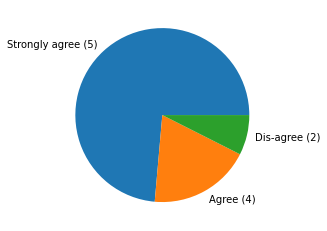

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '34 Gaining access to loyalty programs is a benefit of shopping online':


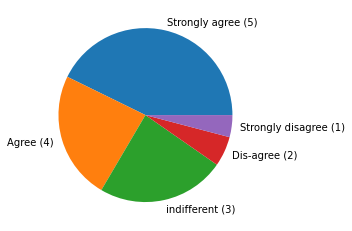

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '35 Displaying quality Information on the website improves satisfaction of customers':


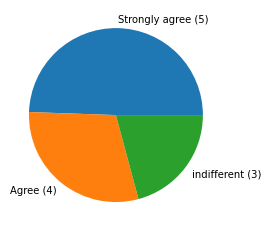

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '36 User derive satisfaction while shopping on a good quality website or application':


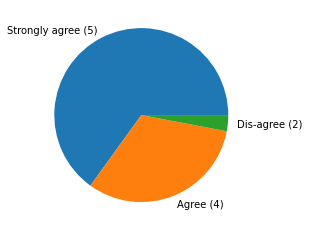

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '37 Net Benefit derived from shopping online can lead to users satisfaction':


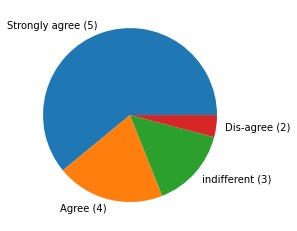

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '38 User satisfaction cannot exist without trust':


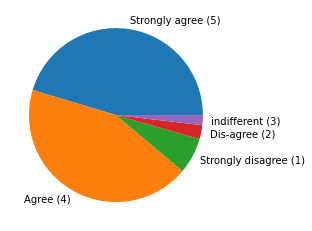

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '39 Offering a wide variety of listed product in several category':


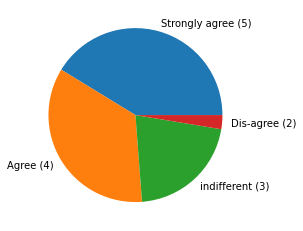

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '40 Provision of complete and relevant product information':


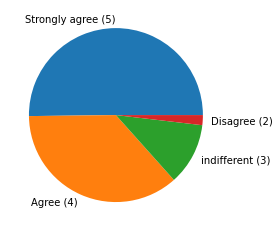

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '41 Monetary savings':


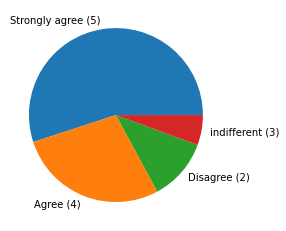

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '42 The Convenience of patronizing the online retailer':


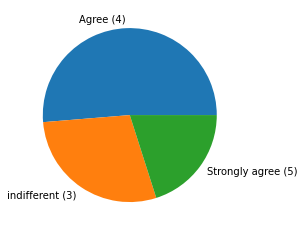

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '43 Shopping on the website gives you the sense of adventure':


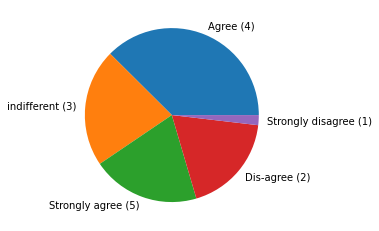

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '44 Shopping on your preferred e-tailer enhances your social status':


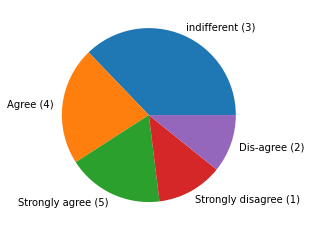

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '45 You feel gratification shopping on your favorite e-tailer':


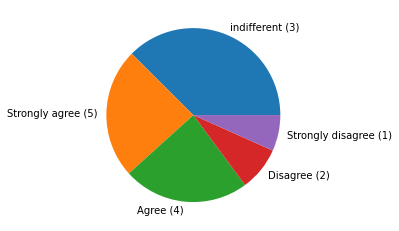

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '46 Shopping on the website helps you fulfill certain roles':


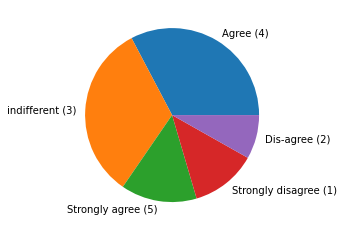

--------------------------------------------------------------------------------------------
Number of customers saying for below online retailers '47 Getting value for money spent':


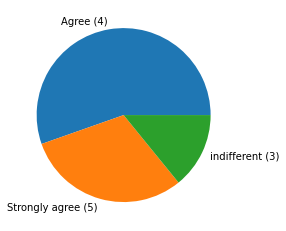

--------------------------------------------------------------------------------------------


In [61]:
for i in range(4,34):
    funcPie1(i)
    print("--------------------------------------------------------------------------------------------")

Very large percentage of customers has voted for "The content on the website must be easy to read and understand" as "Strongly Agree".

Very large percentage of customers has voted for "Information on similar product to the one highlighted  is important for product comparison" as "Strongly Agree".

Very large percentage of customers, almost 80%, has voted for "Complete information on listed seller and product being offered is important for purchase decision." as "Agree"

Very large percentage of customers, almost 90%, has voted for "All relevant information on listed products must be stated clearly" as "Agree or Strongly Agree"

Very large percentage of customers, almost 90%, has voted for "Ease of navigation in website" as "Agree or Strongly Agree"

Very large percentage of customers, almost 90%, has voted for "Fast Loading and processing speed" as "Agree or Strongly Agree"

Very large percentage of customers, almost 70%, has voted for "User friendly Interface of the website" as "Strongly Agree", we can deem it as one of the strongest point where retailers must work hard. It is quite obvious as if I am not able to find the product which I am seeking then the website has literally no meaning to exist.

Very large percentage of customers, almost 80%, has voted for "Convenient Payment methods" as "Strongly Agree or Agree"

Very large percentage of customers, almost 80%, has voted for "Trust that the online retail store will fulfill its part of the transaction at the stipulated time" as "Strongly Agree or Agree"

Very large percentage of customers, almost 90%, has voted for "Empathy (readiness to assist with queries) towards the customers" and "Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)" as "Strongly Agree or Agree", which also seems obvious, as mantra of success relies on "after sales services" in any customer dealing business.

Very large percentage of customers, almost 90%, has voted for "Being able to guarantee the privacy of the customer" as "Strongly Agree or Agree", as everyone wants privacy in their life, as the online retailer have the address details, phone number details and other PII data, so it is very much crucial to keep their data utmost safe.

Very large percentage of customers, almost 70%, has voted for "Online shopping gives monetary benefit and discounts" as "Strongly Agree or Agree", which is a big reaso why customer would prefer to buy online. Since in physical retailers you can bargain unlike online retailers.

Also there are many points due which customer prefer online shopping, like:
Shopping online is convenient and flexible
Gaining access to loyalty programs is a benefit of shopping online
Displaying quality Information on the website improves satisfaction of customers
User derive satisfaction while shopping on a good quality website or application
Net Benefit derived from shopping online can lead to users satisfaction
etc.